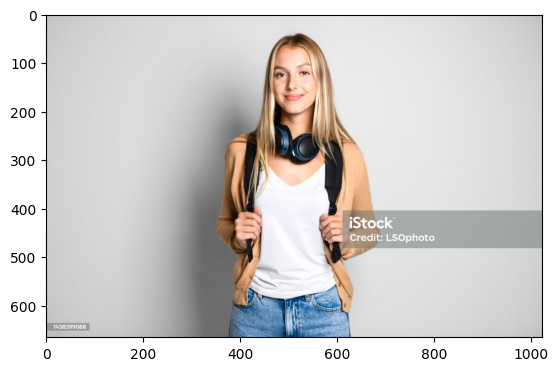

In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# Charger l'image
img = cv2.imread('data/face1.jpg')

# Afficher l'image à l'aide de matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [5]:
results = DeepFace.analyze(img, actions=('gender', 'age', 'emotion', 'race'))

# Afficher les résultats
print(results)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.75it/s]

[{'gender': {'Woman': 99.99998807907104, 'Man': 1.6977708128251834e-05}, 'dominant_gender': 'Woman', 'region': {'x': 449, 'y': 74, 'w': 126, 'h': 126}, 'age': 30, 'emotion': {'angry': 9.253973303202656e-05, 'disgust': 9.601261119485116e-07, 'fear': 0.41688261553645134, 'happy': 99.13751482963562, 'sad': 0.006532086990773678, 'surprise': 0.009976536966860294, 'neutral': 0.4290016368031502}, 'dominant_emotion': 'happy', 'race': {'asian': 0.0026038524083560333, 'indian': 0.0020529176254058257, 'black': 6.231745715012948e-05, 'white': 97.30281233787537, 'middle eastern': 0.681244907900691, 'latino hispanic': 2.0112216472625732}, 'dominant_race': 'white'}]


In [14]:
import cv2
import pandas as pd 
import os
from deepface import DeepFace

data = {
    'Name': [],
    'Age': [],
    'Gender': [],
    'Race': []
}

# Parcourir les fichiers dans le répertoire "data"
for file in os.listdir("data"):
    # Vérifier si le fichier est une image
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Créer le chemin d'accès complet
        file_path = os.path.join("data", file)

        # Analyser l'image seulement si elle existe
        if os.path.exists(file_path):
            # Analyser l'image
            result = DeepFace.analyze(img_path=file_path, actions=['age', 'gender', 'race'])

            # Ajouter les données aux dictionnaires
           # Ajouter les données aux dictionnaires
            data["Name"].append(file.split(".")[0])
            data["Age"].append(result[0]['age'])
            data["Gender"].append(result[0]['dominant_gender'])
            data["Race"].append(result[0]['dominant_race'])  # Accéder au premier élément de la liste 'dominant_race'

        else:
            print(f"Le fichier {file_path} n'existe pas.")
    else:
        print(f"Le fichier {file} n'est pas une image valide.")

# Créer un DataFrame à partir des données
df = pd.DataFrame(data)

# Afficher le DataFrame
print(df)

# Enregistrer le DataFrame au format CSV
df.to_csv('people.csv')


Le fichier .ipynb_checkpoints n'est pas une image valide.


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.46it/s]

Le fichier gender_submission.csv n'est pas une image valide.
Le fichier predections.csv n'est pas une image valide.
Le fichier test.csv n'est pas une image valide.
Le fichier train.csv n'est pas une image valide.
    Name  Age Gender             Race
0  face1   30  Woman            white
1  face2   45    Man  latino hispanic
2  face3   27    Man  latino hispanic
3  face4   31  Woman            white
